# Exploratory Data Analysis

## Load data

In [39]:
import pandas as pd

def load_csv_data(filename):
    """
    Load data from a CSV file and return a pandas DataFrame.

    Args:
        filename (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded data.
    """
    try:
        # timestamp as datetime, date as date, label as category
        df = pd.read_csv(filename, parse_dates=['timestamp', 'date'])
        return df
    except FileNotFoundError:
        print(f"File '{filename}' not found. Please check the path.")
        return None


In [40]:
# load csv data
csv_filename = "hour24.csv"
data_df = load_csv_data(csv_filename)
if data_df is not None:
    print(f"Loaded {len(data_df)} rows from {csv_filename}.")


Loaded 765 rows from hour24.csv.


In [41]:
# print info
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         765 non-null    object        
 1   timestamp  765 non-null    datetime64[ns]
 2   mean       765 non-null    float64       
 3   sum        765 non-null    int64         
 4   median     765 non-null    float64       
 5   std        765 non-null    float64       
 6   min        765 non-null    float64       
 7   max        765 non-null    float64       
 8   date       765 non-null    datetime64[ns]
 9   label      765 non-null    int64         
dtypes: datetime64[ns](2), float64(5), int64(2), object(1)
memory usage: 59.9+ KB
None


## Descriptive Statistics

### Overall Statistics

In [42]:
# describe data
#print(data_df.describe())

# describe data by label
print(data_df.groupby("label", observed=False)[['mean', 'median']].describe())


        mean                                                            \
       count        mean        std        min         25%         50%   
label                                                                    
0      444.0  279.945206  99.002385  83.256250  207.237326  278.193403   
1      321.0  183.388603  98.545601  49.852778   95.956944  174.361806   

                              median                                     \
              75%         max  count        mean        std  min    25%   
label                                                                     
0      343.895486  626.290278  444.0  111.513514  87.813995  0.0  42.75   
1      246.621528  584.284722  321.0   45.781931  60.188668  0.0   2.00   

                            
         50%    75%    max  
label                       
0      103.0  154.0  600.0  
1       26.5   62.0  478.0  


In [43]:
# print date range
print(f"Date range: {data_df['timestamp'].min()} to {data_df['timestamp'].max()}")
# print number of unique days
print(f"Number of unique days: {data_df['timestamp'].dt.date.nunique()}")
# print number of unique hours
print(f"Number of unique hours: {data_df['timestamp'].dt.hour.nunique()}")
# print number of unique ids
print(f"Number of unique ids: {data_df['id'].nunique()}")


Date range: 2002-05-25 00:00:00 to 2006-02-13 00:00:00
Number of unique days: 445
Number of unique hours: 1
Number of unique ids: 55


### Between Groups

#### T-test between groups

In [44]:
# evaluate if there is a difference between labels with t-test
alpha = 0.05
from scipy.stats import ttest_ind
label_0 = data_df[data_df["label"] == 0]["mean"]
label_1 = data_df[data_df["label"] == 1]["mean"]
ttest_result = ttest_ind(label_0, label_1)

# print t-test result
print(f"t-test p-value: {ttest_result.pvalue}")
if ttest_result.pvalue < alpha:
    print("There is a significant difference between the two labels.")


t-test p-value: 1.2469525412850745e-36
There is a significant difference between the two labels.


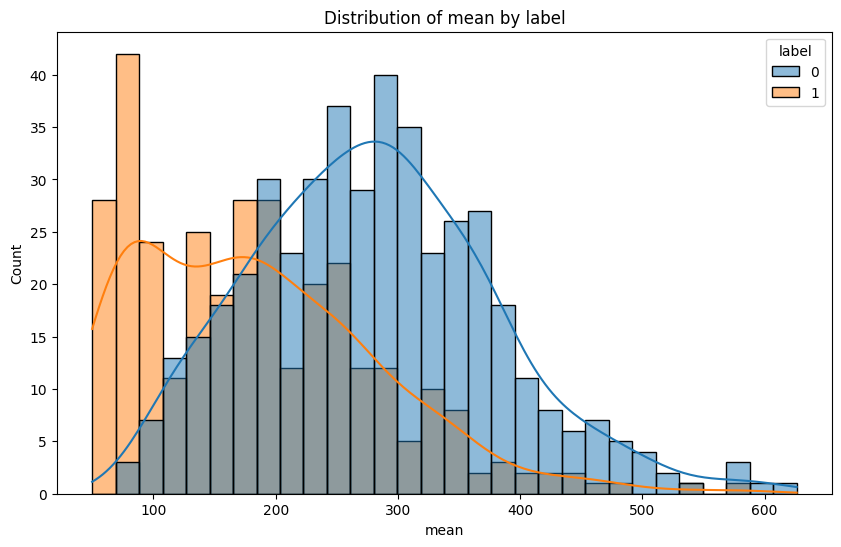

In [45]:
# plot distribution of mean by label
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=data_df, x="mean", hue="label", kde=True, bins=30)
plt.title("Distribution of mean by label")
plt.show()


### Visualising Descriptive Statistics

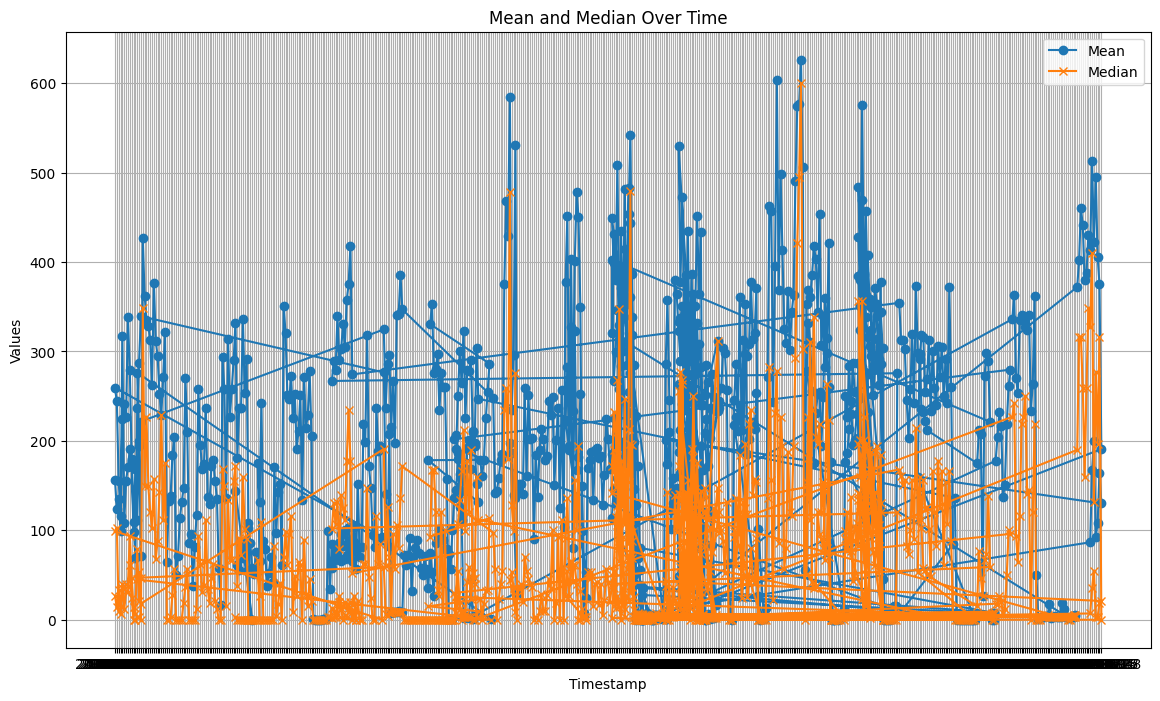

In [8]:
import matplotlib.pyplot as plt

# plot mean and median
plt.figure(figsize=(14, 8))
plt.plot(data_df['timestamp'], data_df['mean'], label='Mean', marker='o')
plt.plot(data_df['timestamp'], data_df['median'], label='Median', marker='x')
plt.xlabel('Timestamp')
plt.ylabel('Activity Level')
plt.title('Mean and Median Over Time')
plt.legend()
plt.grid(True)
plt.show()


